# Symbolic regression with PySR



> PySR is an open-source library for practical symbolic regression, a type of machine learning
which aims to discover human-interpretable symbolic models. Symbolic Regression is a supervised
learning task where the model space is spanned by analytic expressions. In
this family of algorithms, instead of fitting concrete
parameters in some overparameterized general model,
one searches the space of simple analytic expressions
for accurate and interpretable models.\
> -- Cranmer, Interpretable Machine Learning for Science
with PySR and SymbolicRegression.jl

In [1]:
%load_ext autoreload
%autoreload 2

from LoadData import *
from pathlib import Path
import numpy as np
import torch 
import sys 
import time
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from random import randrange
from joblib import dump, load
import sympy
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split


plt.rcParams.update({'font.size': 22})
plt.interactive(True)
plt.close('all')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get input data for fully developed channel flow, $Re = 5200$

In [44]:
minYplus = 30
maxYplus = 2200

y_DNS, yplus_DNS, u_DNS, uu_DNS, vv_DNS, ww_DNS, uv_DNS, k_DNS, eps_DNS, dudy_DNS = GetInputData('FullyDevelopedChannel_Re550', minYplus, maxYplus)
c, a11_DNS, a33_DNS = GetC0andC2(k_DNS, eps_DNS, dudy_DNS, uu_DNS, vv_DNS, ww_DNS)
T = abs(k_DNS / eps_DNS)

Returning data from: FullyDevelopedChannel_Re550. Min yplus: 30. Max yplus: 2200
Returning c = [c0, c2], a11 and a33


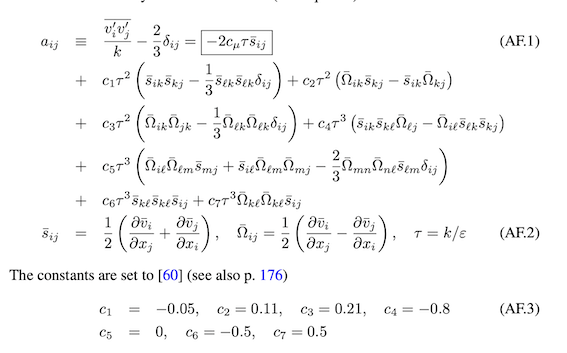 
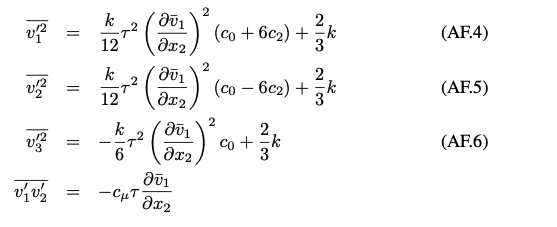


Lets start with the simplest case of the Reynolds stresses for a pure shear flow, $\overline{v_1^{'} v_2^{'}}$



In [45]:
X = np.array([T, dudy_DNS]).T
y = uv_DNS
default_pysr_params = dict(
    populations=50,
    model_selection="best",
)

# Learn equations
model = PySRRegressor(
    niterations=50,
    binary_operators=["*"],
    unary_operators=[],
    **default_pysr_params,
)

model.fit(X, y)


/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                         -0.5205579   
	1  >>>>  2.874115e-01                             x1 * (-0.1814523 * x0)   
	2        3.634796e-02             (x1 * -0.052644994) * ((x1 * x0) * x0)   
	3        5.027105e-08  (0.92002547 * (-0.05722125 * (x1 * x0))) * (x0...   
	4        1.675702e-08  ((x1 * (x0 * ((-0.117027715 * x0) * ((0.303233...   
	
	       loss  complexity  
	0  0.072629           1  
	1  0.023005           5  
	2  0.019892           9  
	3  0.019892          11  
	4  0.019892          17  
]

In [41]:


y_DNS, yplus_DNS, u_DNS, uu_DNS, vv_DNS, ww_DNS, uv_DNS, k_DNS, eps_DNS, dudy_DNS = GetInputData('FullyDevelopedChannel_Re5200', minYplus, maxYplus)
c, a11_DNS, a33_DNS = GetC0andC2(k_DNS, eps_DNS, dudy_DNS, uu_DNS, vv_DNS, ww_DNS)
T = abs(k_DNS / eps_DNS)
X = np.array([T, dudy_DNS]).T
y = uv_DNS
# Learn equations
model = PySRRegressor(
    niterations=50,
    binary_operators=["*"],
    unary_operators=[],
    **default_pysr_params,
)

model.fit(X, y)


Returning data from: FullyDevelopedChannel_Re5200. Min yplus: 30. Max yplus: 2200
Returning c = [c0, c2], a11 and a33


/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                        -0.82359374   
	1  >>>>  3.580063e-01                            x0 * (-0.18345214 * x1)   
	2        7.623571e-09  (0.60142666 * (-0.36805877 * ((x0 * 0.8348841)...   
	3        1.524714e-08  ((1.5751617 * ((0.7493887 * (((-0.5277902 * x1...   
	
	       loss  complexity  
	0  0.013731           1  
	1  0.003279           5  
	2  0.003279          13  
	3  0.003279          17  
]

In [43]:


y_DNS, yplus_DNS, u_DNS, uu_DNS, vv_DNS, ww_DNS, uv_DNS, k_DNS, eps_DNS, dudy_DNS = GetInputData('BoundaryLayer', minYplus, maxYplus)
c, a11_DNS, a33_DNS = GetC0andC2(k_DNS, eps_DNS, dudy_DNS, uu_DNS, vv_DNS, ww_DNS)
T = abs(k_DNS / eps_DNS)
X = np.array([T, dudy_DNS]).T
y = uv_DNS
# Learn equations
model = PySRRegressor(
    niterations=50,
    binary_operators=["*"],
    unary_operators=[],
    **default_pysr_params,
)

model.fit(X, y)

Returning data from: BoundaryLayer. Min yplus: 30. Max yplus: 2200
Returning c = [c0, c2], a11 and a33


/opt/anaconda3/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                         -0.7589332   
	1  >>>>  8.143120e-02                            -0.16505806 * (x1 * x0)   
	2        2.509113e-08                (x1 * (-0.27039728 * x0)) * 0.61045   
	3        1.254556e-08  (0.74298847 * (((1.4538531 * x1) * ((-0.394294...   
	
	       loss  complexity  
	0  0.055200           1  
	1  0.039855           5  
	2  0.039855           7  
	3  0.039855          15  
]

We have not been given the numerical value of $c_\mu$ but PySR suggests that the expression should read:

$\overline{v_1^{'} v_2^{'}} = - c_\mu \tau \frac{\partial \overline{v}_1}{\partial \overline{x}_2}$ \
\
where 
| Parameter | Fully developed channel, $Re = 550$ | Fully developed channel, $Re = 5200$ | Boundary layer |
| --- | --- | --- | --- |
| $c_\mu $| 0.18145 | 0.18345 | 0.16505 |